In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import math
from pandas.api.types import CategoricalDtype


         0         1    2
0      Trd     0.975  222
1      Trd     1.592  259
2      Trd     2.050  286
3      Trd     3.042  214
4      Trd     3.333  177
...    ...       ...  ...
10111  Trd  3599.250  459
10112  Trd  3599.458  500
10113  Trd  3599.583  582
10114  Trd  3599.700  447
10115  Trd  3599.758  441

[10116 rows x 3 columns]


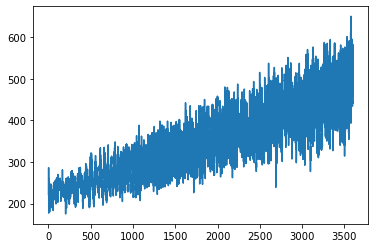

In [2]:
n=0
#trial_id = 'TEST_' + str(n)
transactions = pd.read_csv('TEST_' + str(n) + '_transactions.csv', header=None)
print(transactions)
x = transactions.iloc[:,1]
y = transactions.iloc[:,2]
plt.plot(x,y)

In [3]:
blotters = pd.read_csv('TEST_' + str(n) + '_blotters.csv', header=0)
blotters = blotters.reset_index()
blotters = blotters.iloc[:,[3,4,5,6]]
blotters.columns = ['Time', 'Price', 'Party1', 'Party2']
blotters['Time'] = blotters['Time'].str.replace('\'time\':', "")
blotters['Price'] = blotters['Price'].str.replace('\'price\':', "")
blotters['Party1'] = blotters['Party1'].str.replace('\'party1\':', "")
blotters['Party2'] = blotters['Party2'].str.replace('\'party2\':', "")
blotters['Party1'] = blotters['Party1'].str.replace("\'","")
blotters['Party2'] = blotters['Party2'].str.replace("\'","")

blotters

,Time,Price,Party1,Party2
0,1329.8333333364606,238,B00,S07
1,1700.3250000078447,270,B00,S06
2,1914.7250000105746,318,B00,S44
3,1959.258333344475,303,B00,S22
4,2228.8916666763057,333,B00,S24
...,...,...,...,...
20346,3544.9249999904882,497,S59,B36
20347,3554.1999999903533,487,S59,B15
20348,3562.516666656899,523,S59,B01
20349,3580.6166666566355,580,S59,B50


In [4]:
TraderTypes = pd.Series(["ZIP", "ZIC", "SHVR", "GVWY", "PRZI", "PRSH"])

blotters['BuyerType'] = blotters.Party1
blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B0.'), 'ZIP', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B1.'), 'ZIC', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B2.'), 'SHVR', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B3.'), 'GVWY', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B4.'), 'PRZI', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party1).str.contains('B5.'), 'PRSH', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B0.'), 'ZIP', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B1.'), 'ZIC', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B2.'), 'SHVR', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B3.'), 'GVWY', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B4.'), 'PRZI', blotters.BuyerType)
blotters.BuyerType = np.where(pd.Series(blotters.Party2).str.contains('B5.'), 'PRSH', blotters.BuyerType)
blotters.BuyerType = blotters.BuyerType.astype(CategoricalDtype())

blotters['SellerType'] = blotters.Party1
blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S0.'), 'ZIP', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S1.'), 'ZIC', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S2.'), 'SHVR', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S3.'), 'GVWY', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S4.'), 'PRZI', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party1).str.contains('S5.'), 'PRSH', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S0.'), 'ZIP', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S1.'), 'ZIC', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S2.'), 'SHVR', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S3.'), 'GVWY', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S4.'), 'PRZI', blotters.SellerType)
blotters.SellerType = np.where(pd.Series(blotters.Party2).str.contains('S5.'), 'PRSH', blotters.SellerType)
blotters.SellerType = blotters.SellerType.astype(CategoricalDtype())
blotters

,Time,Price,Party1,Party2,BuyerType,SellerType
0,1329.8333333364606,238,B00,S07,ZIP,ZIP
1,1700.3250000078447,270,B00,S06,ZIP,ZIP
2,1914.7250000105746,318,B00,S44,ZIP,PRZI
3,1959.258333344475,303,B00,S22,ZIP,SHVR
4,2228.8916666763057,333,B00,S24,ZIP,SHVR
...,...,...,...,...,...,...
20346,3544.9249999904882,497,S59,B36,GVWY,PRSH
20347,3554.1999999903533,487,S59,B15,ZIC,PRSH
20348,3562.516666656899,523,S59,B01,ZIP,PRSH
20349,3580.6166666566355,580,S59,B50,PRSH,PRSH


In [5]:
blotters = blotters.drop_duplicates()
blotters = blotters.dropna()
blotters.Price = pd.to_numeric(blotters.Price)
blotters.Time = pd.to_numeric(blotters.Time)
blotters.sort_values(by='Time', inplace=True)
blotters

,Time,Price,Party1,Party2,BuyerType,SellerType
3393,0.975000,222,B35,S09,GVWY,ZIP
9042,1.591667,259,B56,S07,PRSH,ZIP
9544,2.050000,286,B58,S22,PRSH,SHVR
3033,3.041667,214,B33,S17,GVWY,ZIC
1770,3.333333,177,B24,S14,SHVR,ZIC
...,...,...,...,...,...,...
2788,3599.250000,459,B30,S35,GVWY,GVWY
4783,3599.458333,500,B40,S29,PRZI,SHVR
928,3599.583333,582,S21,B15,ZIC,SHVR
4485,3599.700000,447,B39,S10,GVWY,ZIC


In [6]:
#t = blotters.Time
#offset = (t/15) + (t/15) * math.sin((t/(math.pi*3000))*t)

def equilibrium(t):
    pi2 = math.pi * 2
    c = math.pi * 3000
    wavelength = t / c
    gradient = 100 * t / (c / pi2)
    amplitude = 100 * t / (c / pi2)
    offset = gradient + amplitude * math.sin(wavelength * t)
    equilibrium = 200 + offset
    return int(round(equilibrium, 0))

blotters['Equilibrium'] = blotters.Time.apply(equilibrium)
blotters['NetProfit'] = blotters.Price - blotters.Equilibrium
blotters

,Time,Price,Party1,Party2,BuyerType,SellerType,Equilibrium,NetProfit
3393,0.975000,222,B35,S09,GVWY,ZIP,200,22
9042,1.591667,259,B56,S07,PRSH,ZIP,200,59
9544,2.050000,286,B58,S22,PRSH,SHVR,200,86
3033,3.041667,214,B33,S17,GVWY,ZIC,200,14
1770,3.333333,177,B24,S14,SHVR,ZIC,200,-23
...,...,...,...,...,...,...,...,...
2788,3599.250000,459,B30,S35,GVWY,GVWY,201,258
4783,3599.458333,500,B40,S29,PRZI,SHVR,207,293
928,3599.583333,582,S21,B15,ZIC,SHVR,213,369
4485,3599.700000,447,B39,S10,GVWY,ZIC,221,226


,Time,Price,Party1,Party2,BuyerType,SellerType,Equilibrium,NetProfit,cum_profit,Cum_Profit
3393,0.975000,222,B35,S09,GVWY,ZIP,200,22,22,22
9042,1.591667,259,B56,S07,PRSH,ZIP,200,59,81,81
9544,2.050000,286,B58,S22,PRSH,SHVR,200,86,167,167
3033,3.041667,214,B33,S17,GVWY,ZIC,200,14,181,181
1770,3.333333,177,B24,S14,SHVR,ZIC,200,-23,158,158
...,...,...,...,...,...,...,...,...,...,...
2788,3599.250000,459,B30,S35,GVWY,GVWY,201,258,195792,195792
4783,3599.458333,500,B40,S29,PRZI,SHVR,207,293,196085,196085
928,3599.583333,582,S21,B15,ZIC,SHVR,213,369,196454,196454
4485,3599.700000,447,B39,S10,GVWY,ZIC,221,226,196680,196680


/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: unhashable type: 'numpy.ndarray'

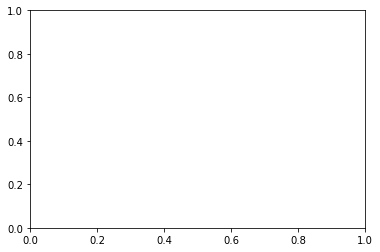

In [44]:
ZIP = blotters.groupby('BuyerType').Cum_Profit


plt.plot(blotters.Time, ZIP)

<AxesSubplot:>

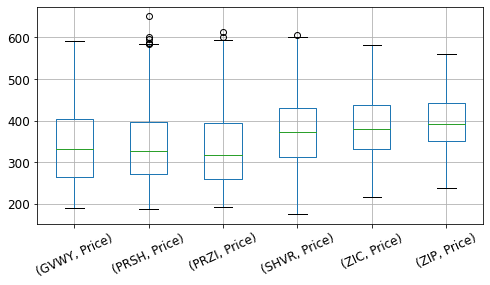

In [9]:
groupby_buyers.boxplot(column='Price', subplots=False, rot=25, fontsize=12, figsize=(8,4))

In [45]:
groupby_buyers.plot(x='Time',y='CumSum')

KeyError: 'CumSum'

In [11]:
blotters.groupby('BuyerType').Price.agg(['count','median', 'mean'])
blotters.groupby('BuyerType').Price

In [12]:
blotters.groupby('BuyerType').Price.agg(['count','median', 'mean'])
blotters.groupby('SellerType').Price.agg(['count','median', 'mean'])

,count,median,mean
SellerType,,,
GVWY,2008,332.0,342.920817
PRSH,875,393.0,399.885714
PRZI,750,372.5,379.414667
SHVR,1563,336.0,342.452975
ZIC,2360,332.0,339.814831
ZIP,2560,325.0,336.988672


In [13]:
pd.core.groupby.DataFrameGroupBy.describe(groupby_buyers.Price)

,count,mean,std,min,25%,50%,75%,max
BuyerType,,,,,,,,
GVWY,1918.0,340.438999,89.407802,190.0,263.25,332.0,404.0,592.0
PRSH,2981.0,339.622610,84.109521,188.0,271.00,327.0,396.0,650.0
PRZI,2688.0,334.325521,86.327654,192.0,260.00,318.0,395.0,612.0
SHVR,1236.0,370.228964,82.780067,175.0,312.00,372.0,429.0,606.0
ZIC,755.0,383.554967,73.635262,216.0,330.50,380.0,437.0,582.0
ZIP,538.0,393.537175,64.797030,238.0,350.00,391.0,441.0,561.0


In [22]:
pd.core.groupby.DataFrameGroupBy.describe(groupby_buyers.NetProfit)

,count,mean,std,min,25%,50%,75%,max
BuyerType,,,,,,,,
GVWY,1918.0,4.816475,104.790133,-296.0,-59.00,8.0,48.00,372.0
PRSH,2981.0,25.608521,101.520141,-272.0,-32.00,25.0,79.00,377.0
PRZI,2688.0,15.212798,97.922955,-278.0,-39.25,18.5,56.00,348.0
SHVR,1236.0,26.952265,132.791304,-290.0,-73.00,13.0,128.00,325.0
ZIC,755.0,12.511258,142.809618,-279.0,-109.00,15.0,123.00,369.0
ZIP,538.0,51.425651,150.448328,-280.0,-78.00,83.0,168.75,347.0


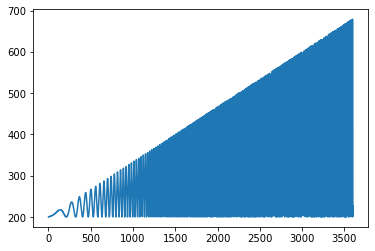

In [26]:
x = blotters.Time
y = blotters.Equilibrium

plt.plot(x,y)

<AxesSubplot:>

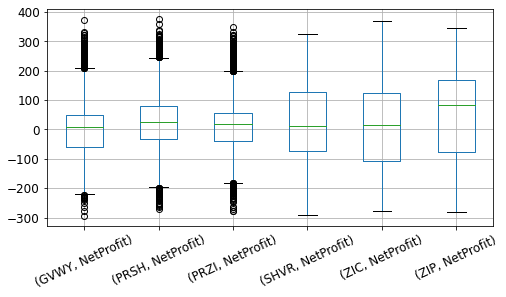

In [25]:
groupby_buyers.boxplot(column='NetProfit', subplots=False, rot=25, fontsize=12, figsize=(8,4))

In [29]:
ZIP_buyers = groupby_buyers.get_group('ZIP').describe()
ZIP_sellers = groupby_sellers.get_group('ZIP')
print(ZIP_buyers)
print(ZIP_sellers)

              Time       Price  Equilibrium   NetProfit
count   538.000000  538.000000   538.000000  538.000000
mean   2687.865366  393.537175   342.111524   51.425651
std     607.355675   64.797030   144.625383  150.448328
min    1135.225000  238.000000   200.000000 -280.000000
25%    2248.931250  350.000000   214.000000  -78.000000
50%    2759.445833  391.000000   284.000000   83.000000
75%    3216.477083  441.000000   467.750000  168.750000
max    3591.416667  561.000000   675.000000  347.000000
             Time  Price Party1 Party2 BuyerType SellerType  Equilibrium  \
3393     0.975000    222    B35    S09      GVWY        ZIP          200   
9042     1.591667    259    B56    S07      PRSH        ZIP          200   
4785     4.300000    203    B41    S06      PRZI        ZIP          200   
7477     4.366667    260    S02    B51      PRSH        ZIP          200   
8729     5.650000    208    B55    S01      PRSH        ZIP          200   
...           ...    ...    ...    ...  

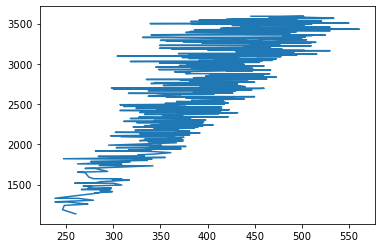

In [20]:
x=ZIP_buyers.Price
y=ZIP_buyers.Time

plt.plot(x,y)

In [31]:
ZIP = blotters.get_group('ZIP')
ZIP.head()

#g = blotters.groupby('BuyerType')
#g.groups.keys()

AttributeError: 'DataFrame' object has no attribute 'get_group'

In [ ]:
blotters.groupby('BuyerType').size().plot(kind='bar')

In [ ]:
blotters.groupby('SellerType').size().plot(kind='bar')

In [ ]:
ZIP_transactions = 

In [ ]:
blotters.describe()

In [ ]:
blotters.SellerType

In [ ]:
#x1 = blotters.iloc[:, BuyerType='ZIP'].values
y1 = blotters.iloc[:,1].values
print(x1)
print(y1)

In [ ]:
plt.figure()
plt.plot(x1,y1)
plt.ylabel('Price')
plt.show()